<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

##Data Preparation/ Analysis

In [16]:
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [14]:
data.shape

(1000, 12)

In [17]:
sns.pairplot(data)

In [ ]:
# Converting our data into a tensor
tensor_data = tf.cast(tf.constant(data), tf.float32)  # casting our data to float 32
print(tensor_data)

In [ ]:
 # suffle our data to avoid data baised.
 tensor_data = tf.random.shuffle(tensor_data)
 print(tensor_data[:5])

In [ ]:
X = tensor_data[:, 3:-1]
print(X.shape)

In [ ]:
y = tensor_data[:, -1]
print(y.shape)
print(X[:5])

In [ ]:
y = tf.expand_dims(y, axis=-1)
print(y[:5])

In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([3,4,5,6,7])
normalizer(x_normalized)

In [ ]:
print(X.shape)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5,)),
    normalizer,
    Dense(1)
])

model.summary()

In [ ]:
model.build(input_shape=(None, X.shape[1]))

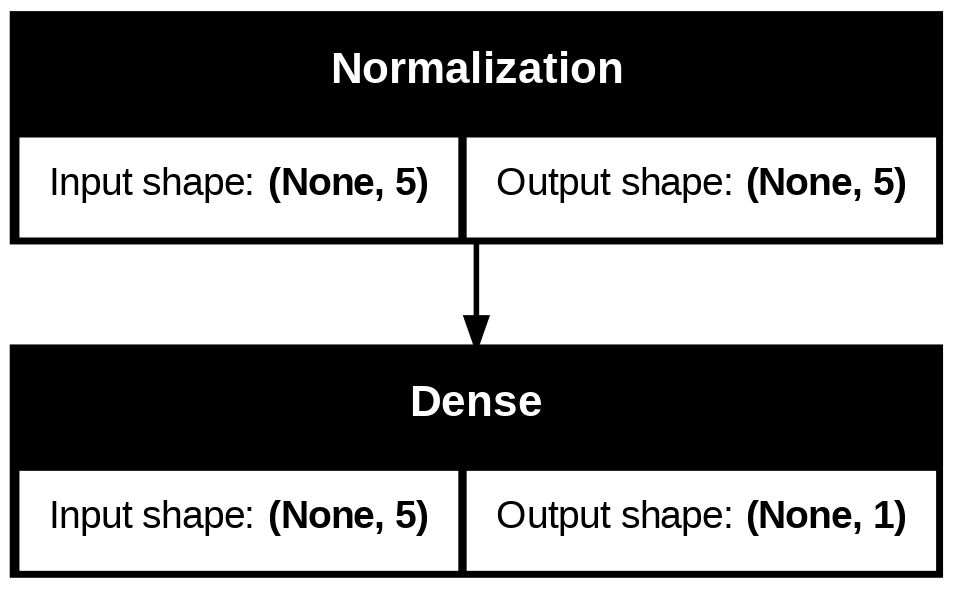

In [20]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [21]:
model.compile(loss = MeanAbsoluteError(), optimizer=Adam())

In [22]:
model.fit(X,y, epochs = 100, verbose=1)

Epoch 1/100


ValueError: Exception encountered when calling Normalization.call().

[1mDimensions must be equal, but are 8 and 5 for '{{node sequential_1/normalization_1/Sub}} = Sub[T=DT_FLOAT](data, sequential_1/normalization_1/Sub/y)' with input shapes: [?,8], [5].[0m

Arguments received by Normalization.call():
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)

In [23]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [25]:
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]

print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [26]:
 X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
 y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
 print(X_val.shape)
 print(y_val.shape)

(100, 8)
(100, 1)


In [29]:
X_test = X[int(DATASET_SIZE * (TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO+VAL_RATIO)):]

print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [30]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.828422  ,  0.34075564, -0.72388864, -0.53855103,  0.59046185,
         0.2140302 ,  0.4755396 ,  0.7309278 ],
       [-0.8989569 , -1.3874313 ,  0.7166856 , -1.6032318 , -1.222857  ,
        -1.0882529 ,  1.0970037 ,  1.0135713 ],
       [-0.8989569 , -0.42787576, -1.4441758 , -1.2483382 , -0.7695273 ,
        -0.9840703 , -1.6278771 , -0.39964607],
       [-1.4747498 , -0.4689519 ,  1.4369727 , -1.2483382 , -0.31619757,
        -1.0361617 ,  1.0970037 ,  1.1077858 ],
       [-1.4747498 , -1.0058609 , -0.00360152, -0.18365741,  0.59046185,
         0.0056649 , -1.102023  ,  1.531751  ]], dtype=float32)>

In [37]:
model.compile(optimizer=Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()]
              )

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)
history

Epoch 1/100


ValueError: Exception encountered when calling Normalization.call().

[1mDimensions must be equal, but are 8 and 5 for '{{node sequential_1/normalization_1/Sub}} = Sub[T=DT_FLOAT](data, sequential_1/normalization_1/Sub/y)' with input shapes: [32,8], [5].[0m

Arguments received by Normalization.call():
  • inputs=tf.Tensor(shape=(32, 8), dtype=float32)